Considere que deseja-se colocar em um recipiente vários objetos escolhidos
entre os 9 apresentados na tabela abaixo. Os objetos devem ser escolhidos de tal forma que
o valor total dos objetos colocados no recipiente seja o máximo, desde que o peso total dos
objetos selecionados não ultrapasse 150 kg . Por exemplo, o recipiente poderia conter os
objetos a, b, c, d, e, f , g, o que daria um total de 144 kg, com um valor total de R$ 147.


---


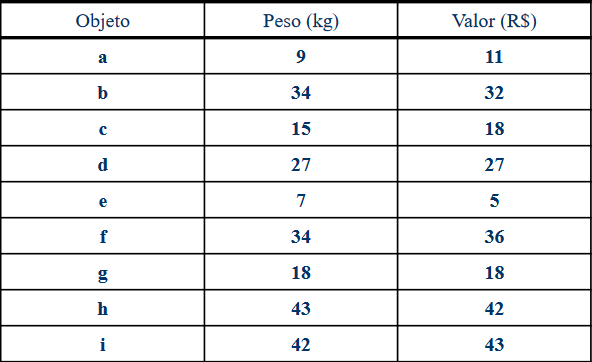


---

Projete um Algoritmo Genético para resolver este problema de otimização. Defina os operadores de reprodução, o mecanismo de seleção e a função de avaliação (fitness) a serem utilizados.


## Código

In [1]:
import numpy as np

In [2]:
weights = np.array([9, 34, 15, 27, 7, 34, 18, 43, 42])
prices = np.array([11, 32, 18, 27, 5, 36, 18, 42, 43])

In [3]:
class EvolutionarySystem:
    def __init__(self, initial_pop: list[list[int]], num_gens=500, mutation_rate=0.1):
        self.population = np.array(initial_pop)
        self.num_gens = num_gens
        self.mutation_rate = mutation_rate

    def get_fitness(self, individual: np.ndarray) -> float:
        weight = 0
        price = 0
        for gene in individual:
            weight += weights[gene]
            price += prices[gene]

        return 0 if weight > 150 else price

    # Retorna as aptidões da população atual
    def get_fitnesses(self) -> np.ndarray:
        return np.array([self.get_fitness(individual) for individual in self.population])

    # Realiza seleção por roleta
    def roulette_selection(self):
        probs = self.fitnesses / self.fitnesses.sum()
        selected_individuals = np.random.choice(len(self.population), size=len(self.population), p=probs)
        self.population = self.population[selected_individuals]
        self.fitnesses = self.fitnesses[selected_individuals]

    # Realiza mutações aleatórias
    def mutate_population(self) -> np.ndarray:
        for i in range(len(self.population)):
            if np.random.rand() < self.mutation_rate:
                mutation_type = np.random.randint(0, 3)
                # Remove gene
                if mutation_type == 0 and len(self.population[i]) > 1:
                    random_idx = np.random.randint(0, len(self.population[i]))
                    self.population[i] = np.delete(self.population[i], random_idx)
                # Substitui gene
                elif mutation_type == 1:
                    random_gene = np.random.randint(0, len(self.population[i]))
                    self.population[i][random_gene] = np.random.randint(0, len(prices))
                # Insere gene
                else:
                    self.population[i] = np.insert(self.population[i], 0, np.random.randint(0, len(prices)))

                self.fitnesses[i] = self.get_fitness(self.population[i])

    def run(self) -> np.ndarray:
        self.fitnesses = self.get_fitnesses()
        for _ in range(self.num_gens):
            self.roulette_selection()
            self.mutate_population()

        best_idx = np.argmax(self.fitnesses)
        return self.population[best_idx], self.fitnesses[best_idx]

In [4]:
'''
def generate_bag():
    weight = 0
    bag = []
    while True:
        i = np.random.randint(0, len(prices))
        weight += weights[i]
        if weight > 150:
            break
        bag.append(i)

    return np.array(bag)
'''


def generate_bag():
    bag = []
    for _ in range(np.random.randint(1, 16)):
        bag.append(np.random.randint(len(prices)))
    return np.array(bag)


def generate_population(size: int):
    return np.array([generate_bag() for _ in range(size)], dtype=object)

In [10]:
population = generate_population(10)
system = EvolutionarySystem(population, num_gens=100)
best_bag, price = system.run()
print(f'Melhor recipiente: {best_bag}')
print(f'Melhor preço: {price}')

Melhor recipiente: [2 5 6 5 4 1]
Melhor preço: 138


In [6]:
population = generate_population(100)
system = EvolutionarySystem(population, num_gens=1000)
best_bag, price = system.run()
print(f'Melhor recipiente: {best_bag}')
print(f'Melhor preço: {price}')

Melhor recipiente: [6 4 8 7 3 1 2 2]
Melhor preço: 159


In [8]:
population = generate_population(500)
system = EvolutionarySystem(population, num_gens=5000)
best_bag, price = system.run()
print(f'Melhor recipiente: {best_bag}')
print(f'Melhor preço: {price}')

Melhor recipiente: [8 5 2 1 1 6 5 7]
Melhor preço: 166
